In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [30]:
df = pd.read_csv('/Users/lukebarrett/Desktop/UC Davis/STA Courses/STA 160/Data/HD_indicators_cleaned.csv')

In [33]:
df.head()

,Unnamed: 0,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,HD+Stroke
0,0,0,1,1,1,3,1,0,0,0,...,0,5,2,2,1,0,9,4,3,1
1,1,0,0,0,0,2,1,0,0,1,...,1,3,1,1,0,0,7,6,1,1
2,2,0,1,1,1,2,0,0,0,0,...,1,5,3,3,1,0,9,4,8,1
3,3,0,1,0,1,2,0,0,0,1,...,0,2,1,1,0,0,11,3,6,1
4,4,0,1,1,1,1,0,0,0,1,...,0,2,1,1,0,0,11,5,4,1


In [18]:
df.dtypes

Unnamed: 0              int64
HeartDiseaseorAttack    int64
HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
Diabetes                int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
HD+Stroke               int64
dtype: object

In [88]:
# establishing test and train set
X = df.drop(['Unnamed: 0','HeartDiseaseorAttack','Stroke','HD+Stroke'], axis=1) #dropping target
y = df['HD+Stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [89]:
#define random forest classifier(rfc) object
rfc1 = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)

#fitting rfc to data
rfc1.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=42)

In [90]:
y_pred = rfc1.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[65620   187  1169   101]
 [ 1795    15   107    13]
 [ 5321    43   521    45]
 [  999    10   136    22]]
              precision    recall  f1-score   support

           1       0.89      0.98      0.93     67077
           2       0.06      0.01      0.01      1930
           3       0.27      0.09      0.13      5930
           4       0.12      0.02      0.03      1167

    accuracy                           0.87     76104
   macro avg       0.33      0.27      0.28     76104
weighted avg       0.81      0.87      0.83     76104



In [92]:
#calculating oob_score of testing data
print("OOB error score for testing set:", 1 - rfc1.oob_score_)

OOB error score for testing set: 0.13193787448754335


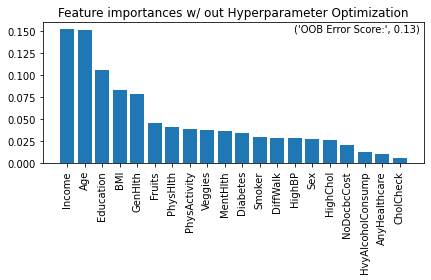

In [98]:
#extracting features for plot
importances = rfc1.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

#plotting importnances of rfc
%matplotlib inline

d, ax = plt.subplots()
plt.title("Feature importances w/ out Hyperparameter Optimization")
plt.text(.99, .99, ("OOB Error Score:", round(1 - rfc1.oob_score_,2)), ha='right', va='top', transform=ax.transAxes)
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
d.tight_layout()

In [56]:
#defining parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 5, 10],
    'max_depth': [None, 5, 10]
}

#define rfc object
rfc2 = RandomForestClassifier(oob_score=True, random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(rfc2, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Print the OOB score of the best model
print("OOB score:", grid_search.best_estimator_.oob_score_)

Best hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 100}
OOB score: 0.8805412893634275


In [60]:
#rfc model with GridSearchCV
rfc3 = RandomForestClassifier(n_estimators=100,
                              max_depth=10,
                              max_features='sqrt', 
                              min_samples_leaf=1,
                              oob_score=True,
                              random_state=42)

#fitting rfc to data
rfc3.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', oob_score=True,
                       random_state=42)

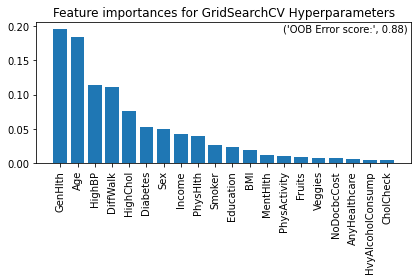

In [99]:
#extracting features for plot
importances = rfc3.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

#plotting importances of rfc
%matplotlib inline

f, ax = plt.subplots()
plt.title("Feature importances for GridSearchCV Hyperparameters")
plt.text(.99, .99, ("OOB Error score:", round(grid_search.best_estimator_.oob_score_,2)), ha='right', va='top', transform=ax.transAxes)
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
f.tight_layout()